In [6]:
# 1. Implement a simple GAN architecture to generate random images (like noise or basic shapes) using TensorFlow/Keras:

import tensorflow as tf
from tensorflow.keras import layers

# Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=100),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model

# Compile models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
# 2. Implement the discriminator for a GAN with an image input of shape (28, 28):

def build_discriminator():
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train / 255.0  # Normalize the images to [0, 1]
x_train = x_train.reshape((-1, 28, 28, 1))  # Reshape to match GAN input

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten input images
        tf.keras.layers.Dense(128, activation='relu'),     # Dense layer with ReLU activation
        tf.keras.layers.Dense(1, activation='sigmoid')     # Output layer with sigmoid for binary classification
    ])
    return model

# Compile discriminator model
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Test the discriminator with a batch of real images
def test_discriminator_with_real_images():
    # Load a batch of real images from MNIST dataset
    batch_size = 128
    idx = tf.random.uniform([batch_size], minval=0, maxval=x_train.shape[0], dtype=tf.int32)
    real_images = tf.gather(x_train, idx)  # Get real images from the dataset

    # Use the discriminator to classify the real images
    real_labels = tf.ones((batch_size, 1))  # Labels for real images
    predictions = discriminator(real_images, training=False)

    # Compute loss (compare predictions with real labels)
    loss = tf.reduce_mean(tf.losses.binary_crossentropy(real_labels, predictions))
    print(f"Discriminator loss on real images: {loss.numpy()}")

# Call the function to test the discriminator with real images
test_discriminator_with_real_images()


11490434/11490434 [==============================] - 6s 1us/step
Discriminator loss on real images: 0.9048472046852112


In [9]:
#4. Implement WGAN by modifying the loss function in the GAN:

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

# Modify discriminator and generator loss for WGAN
discriminator.compile(optimizer='adam', loss=wasserstein_loss)
gan.compile(optimizer='adam', loss=wasserstein_loss)

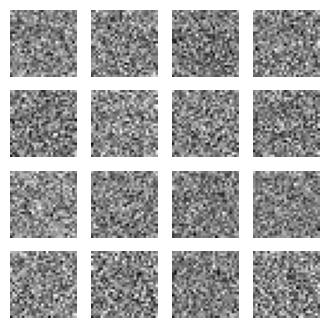

In [10]:
#5. Use a trained generator to generate a batch of fake images and display them:

def generate_fake_images(generator, batch_size=16):
    noise = tf.random.normal([batch_size, 100])
    fake_images = generator(noise, training=False)
    return fake_images

# Display generated images
fake_images = generate_fake_images(generator)
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(fake_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

In [11]:
#6. Create a StyleGAN-inspired architecture that outputs high-resolution images:

def build_stylegan_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=100),
        layers.Reshape((16, 16, 1)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(3, kernel_size=3, padding='same', activation='sigmoid')  # High-resolution RGB output
    ])
    return model

In [12]:
#7. Implement the Wasserstein loss function for GAN training:

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

# Using WGAN
discriminator.compile(optimizer='adam', loss=wasserstein_loss)
gan.compile(optimizer='adam', loss=wasserstein_loss)

In [13]:
#8. Write a function to modify the discriminator to include a dropout layer with a rate of 0.4 and print the configurations:

def modify_discriminator_with_dropout(discriminator):
    model = tf.keras.Sequential([
        *discriminator.layers[:-1],  # Keeping all layers except the last
        layers.Dropout(0.4),  # Add dropout layer with rate of 0.4
        discriminator.layers[-1]  # Keeping the final output layer
    ])
    model.summary()
    return model

discriminator = modify_discriminator_with_dropout(discriminator)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#9. Write a function to modify the discriminator to include a dropout layer with a rate of 0.4 and print the configurations:

def modify_discriminator_with_dropout(discriminator):
    model = tf.keras.Sequential([
        *discriminator.layers[:-1],  # Keeping all layers except the last
        layers.Dropout(0.4),  # Add dropout layer with rate of 0.4
        discriminator.layers[-1]  # Keeping the final output layer
    ])
    model.summary()
    return model

discriminator = modify_discriminator_with_dropout(discriminator)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
